## Assignment 1
Qi Liu 
20201004

In [1]:
# Import some necessary modules first
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Part 1: Identify suitable web APIs and collect data

The first and main data which I choose is about COVID-19 situation in the U.S., and it is completely open, no need to apply for API.

In [2]:
url = 'https://api.covidtracking.com/v1/us/daily.json'
# Using *try...except** statements to find errors
try: 
    get_data=requests.get(url).json()
    raw_data=pd.DataFrame(get_data)
except:
    print("Failed to retrieve %s" % url)

In [5]:
# Show the first few rows of the data
raw_data.head(3)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756184.0,74582825.0,11808.0,40212.0,878613.0,8137.0,45475.0,2801.0,...,2021-03-07T24:00:00Z,None,0,0,839,726,131835,41530,1169754,74952fef2e04125e96bbf3007726bc3e64a6a6d8
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,21a596203ad2c78f4e54d1e69967caf126a2a5a7
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222


# Part 2: Parse the collected data, and store it in an appropriate file format

In [7]:
# Show the attributes of all columns of this data
print(raw_data.columns.tolist())

['date', 'states', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'dateChecked', 'death', 'hospitalized', 'totalTestResults', 'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease', 'hash']


<font color=red size=3 >  Start pre-processing raw data:

In [8]:
# according to the description on the website （https://covidtracking.com/data/api)
# the following items are not recommended: dateChecked, hospitalization, lastModified, total, posNeg, hash
# besides, I found that all the values in the column 'recovered' are none
raw_data['recovered'].notnull().sum() # looking for missing data

0

In [11]:
# So delete these useless data
deprecated=["dateChecked","hospitalized","lastModified","recovered","total","posNeg","hash"]
data=raw_data.drop(deprecated,axis=1)
# Make data cleaner and easy to operate
data=data.fillna(0) # filling for missing data
data=data.astype(int) # converse the data format

<font color= blue> Here is a simple small function which make convenient to check the specific daily situation.

In [12]:
def case(date):
    try:
        case_data=data.set_index("date") # change the data index
        positive_case = case_data['positive'][date] # extract data that people are interested in
        death_case=case_data['death'][date]
        increase_positive=case_data['positiveIncrease'][date]
        increase_death=case_data['deathIncrease'][date]
        print("date:%s" % date) # print the results of this function
        print("total cases is %s" % positive_case)
        print("the new cases yesterday is %s" % increase_positive)
        print("total death case is %s" % death_case)
        print("the new death cases is %s" % increase_death)
    except KeyError:
        print("Please check the input date")

In [13]:
case(20210301)

date:20210301
total cases is 28399281
the new cases yesterday is 48092
total death case is 504488
the new death cases is 1241


# Part 3: Represent, analyse the data
Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data. Analyse and summarise the cleaned dataset.

<font color = blue size = 4> In the first part, I put forward and analyzed five aspects that I am interested in

<font color= red> 01 Find the first day when COVID-19 appeared in half and all states/territories in the United States:

In [33]:
# before that, find the first day of the case
data.query('positive==1').head(1)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
413,20200119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0


According to this data, the first case occurred in the United States on 01/19/2020

In [32]:
data=data.sort_values('date') # change date sort
# the date when the cases appear to (more than) half region of the U.S.
data.query('states>27').head(1) # The data counts 56 states and territories in the United States

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
367,20200305,32,305,713,211,0,5,0,0,0,0,20,9538,4,1,132,65,1515,0.213115


Cases occurred in (more than) half of the states on 03/05/2020, the number is 305.

In [29]:
data.query('states>55').head(1) # Find the first day in more than 55 states

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
356,20200316,56,7377,21090,1734,0,43,0,0,0,0,102,82988,22,6,11462,1713,22954,0.232208


There have been cases in every state in the U.S. since 03/16/2020,the number is 7377.

<font color = blue> As can be seen it took less than a month for the case to spread from one state to half of the country, and it took less than 10 days to spread to the whole country.

<font color= red> 02 Find the days when cases are increasing quickly:

In [17]:
data['speed']=data['positiveIncrease']/data['positive'] # define the speed of infection according to this formula
data.sort_values('speed',ascending=False).head(10)['date'] # sort in descending order and view the top ten

413    20200119
371    20200301
368    20200304
411    20200121
370    20200302
395    20200206
369    20200303
398    20200203
366    20200306
362    20200310
Name: date, dtype: int64

It can be seen that the fastest increase in the five days of cases is as above.

<font color = red> 03 Find the day when the number of cases in a single day is greater than 10000:

In [404]:
TenThousand=data[data['positiveIncrease']>100000]

In [405]:
TenThousand.sort_values(by=['positiveIncrease'],ascending=False)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
58,20210108,56,21752049,60732416,11633,131921,720748,23912,38432,7908,3756,360047,268132659,3780,4705,320284,295121,2146223,0.013568
64,20210102,56,20327598,59058013,9356,123614,693716,23133,37309,7910,3684,341800,257729806,2406,3051,221792,280318,1934350,0.013790
59,20210107,56,21456928,60412132,11612,132370,716043,23821,38236,7900,3748,356267,265986436,4079,5312,246578,272043,1928262,0.012679
57,20210109,56,22021417,61022599,10850,130781,727431,23718,38607,7791,3767,363584,270270359,3537,6683,290183,269368,2137700,0.012232
60,20210106,56,21184885,60165554,10062,132474,710731,23708,38064,7946,3739,352188,264058174,3902,6607,263088,250184,1650493,0.011810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,20210206,56,26701332,68678766,12070,84233,824763,17093,42730,5475,4078,452671,321586449,2994,2443,282477,114557,1888854,0.004290
119,20201108,56,10010061,43460293,23353,56942,485485,11223,25819,2977,2900,230135,161479235,513,1467,239635,112445,1266058,0.011233
123,20201104,56,9516490,42245917,10117,52166,476003,10892,25041,2832,2853,226158,155332996,1131,3107,202598,105996,1318451,0.011138
24,20210211,56,27165660,69782378,11981,74225,836774,15190,43291,4970,4113,465568,329212385,3873,2460,260124,102417,1855929,0.003770


The number of new cases per day exceeds 10,000 in these total of 99 days, the detailed data is as above.

<font color = red> 04 Find the day when the number of death cases in a single day is greater than 5000：

In [406]:
data[data['deathIncrease']>5000]

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
31,20210204,56,26455629,68125535,11914,88668,819380,17918,42472,5732,4059,446134,317829099,5212,3402,217496,123907,1663995,0.004684
23,20210212,56,27266690,70038361,9434,71497,839121,14775,43389,4849,4126,470995,331024839,5427,2347,255983,101030,1812454,0.003705


The number of death cases per day exceeds 5,000 in these two days, the detailed data is as above.

<font color = red> 05 Calculate the number of days for cases with positive results more than cases with negative results:

In [35]:
data.loc[lambda x:x['positiveIncrease']>x['negativeIncrease']]

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
413,20200119,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.000000
411,20200121,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.500000
398,20200203,4,3,0,0,0,0,0,0,0,0,0,11,0,0,0,1,3,0.333333
395,20200206,4,5,0,0,0,0,0,0,0,0,0,16,0,0,0,2,1,0.400000
388,20200213,5,6,0,0,0,0,0,0,0,0,0,22,0,0,0,1,1,0.166667
387,20200214,5,7,0,0,0,0,0,0,0,0,0,22,0,0,0,1,0,0.142857
378,20200223,6,8,0,0,0,0,0,0,0,0,0,38,0,0,0,1,0,0.125000
377,20200224,6,9,0,0,0,0,0,0,0,0,0,40,0,0,0,1,2,0.111111
376,20200225,6,10,0,0,0,0,0,0,0,0,0,41,0,0,0,1,1,0.100000
375,20200226,6,12,0,0,0,0,0,0,0,0,2,41,2,0,0,2,0,0.166667


In [ ]:
data.loc[lambda x:x['positiveIncrease']>x['negativeIncrease']].date.count()

In the past year or so, there were more positive cases than negative cases for 25 days.

## Part 4: Data visualization - Matplotlib and Pandas Graphing

In this section, mainly analyze and view data monthly

<font color = red> Parse data as required:

In [36]:
# Convert specific dates to months
data['month']=[x[:6] for x in data['date'].astype(str)]
month_data=data.groupby("month").sum() # summarize data group by month
month_data=month_data.drop(["date","states"],axis=1) # drop meaningless data
month_data=month_data.drop(['202103'],axis=0) # drop incomplete data: cannot be collected because it has not happened yet
month_data.head(5)

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
month,,,,,,,,,,,,,,,,,
202001,24,0,0,0,0,0,0,0,0,0,33,0,0,0,2,8,1.500000
202002,202,0,0,0,0,0,0,0,0,13,20179,5,0,0,16,6547,1.922558
202003,1204026,2792339,483615,97142,118836,14295,1002,2496,0,20720,8650876,4325,23782,460477,196796,1176993,7.784168
202004,19625148,43132728,481938,1510332,2420419,361994,55027,136194,4929,940532,111970900,55267,98714,1843096,876338,5501387,1.636654
202005,45271651,131151759,87642,1375964,5207935,319812,208298,159333,17754,2587697,373518518,41183,85341,4169437,718191,11513468,0.507846


<font color =red> Overview of monthly data:

Text(0.5, 1.0, 'monthly cases')

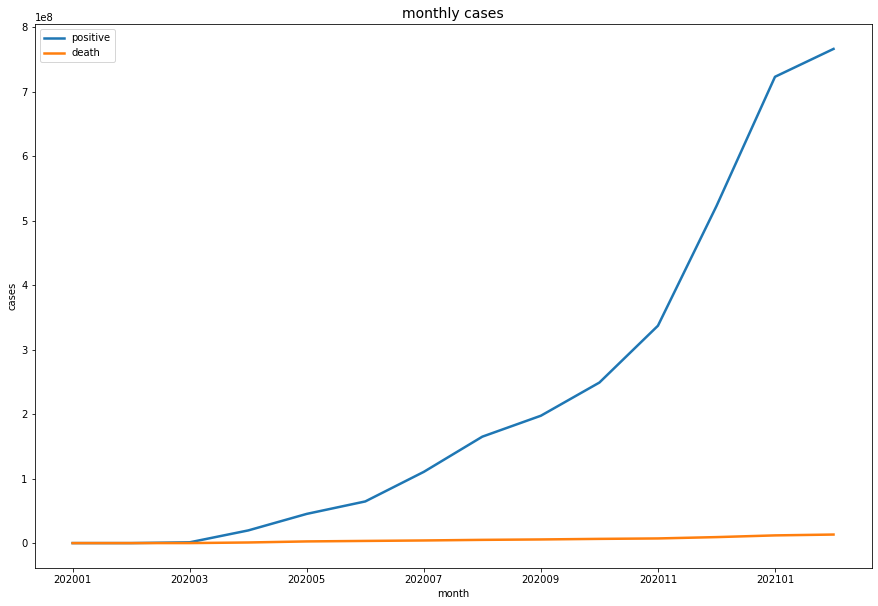

In [74]:
# Plot the cases and deaths for each month
month_data[['positive','death']].plot(figsize=(15,10),linewidth=2.5)
plt.ylabel('cases')
plt.title('monthly cases',fontsize=14)

Text(0.5, 1.0, 'The number of cases admitted to hospital treatment each month')

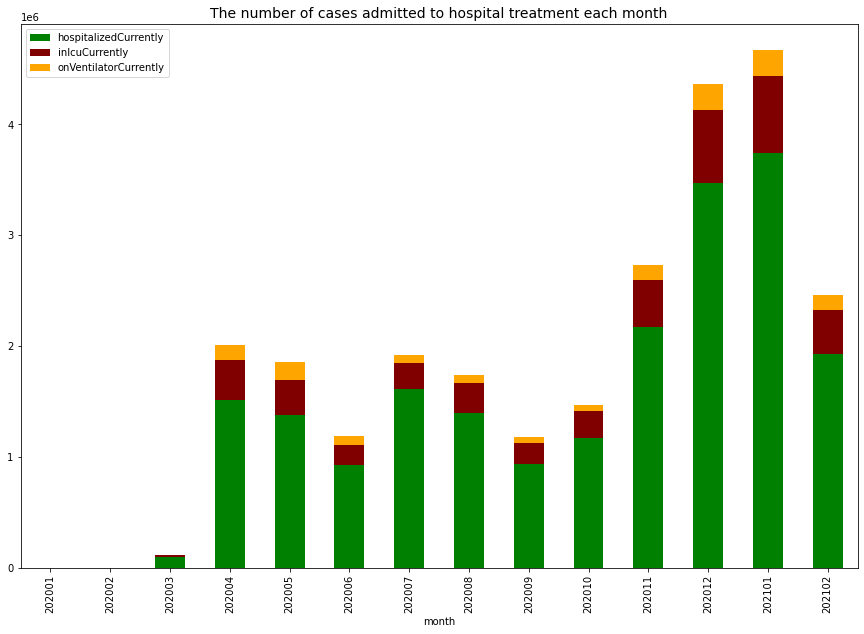

In [77]:
# Plot the number of cases admitted to hospital for treatment each month
# included in the number of  in ICUs and on ventilators
month_data_treatment=month_data[["hospitalizedCurrently","inIcuCurrently","onVentilatorCurrently"]] # collect the required data
month_data_treatment.plot(kind="bar",stacked=True,figsize=(15,10),color=['green','maroon','orange']) # plot stacked bar plots
plt.title('The number of cases admitted to hospital treatment each month',fontsize=14)

array([[<AxesSubplot:xlabel='deathIncrease', ylabel='deathIncrease'>,
        <AxesSubplot:xlabel='hospitalizedIncrease', ylabel='deathIncrease'>,
        <AxesSubplot:xlabel='negativeIncrease', ylabel='deathIncrease'>,
        <AxesSubplot:xlabel='positiveIncrease', ylabel='deathIncrease'>,
        <AxesSubplot:xlabel='totalTestResultsIncrease', ylabel='deathIncrease'>],
       [<AxesSubplot:xlabel='deathIncrease', ylabel='hospitalizedIncrease'>,
        <AxesSubplot:xlabel='hospitalizedIncrease', ylabel='hospitalizedIncrease'>,
        <AxesSubplot:xlabel='negativeIncrease', ylabel='hospitalizedIncrease'>,
        <AxesSubplot:xlabel='positiveIncrease', ylabel='hospitalizedIncrease'>,
        <AxesSubplot:xlabel='totalTestResultsIncrease', ylabel='hospitalizedIncrease'>],
       [<AxesSubplot:xlabel='deathIncrease', ylabel='negativeIncrease'>,
        <AxesSubplot:xlabel='hospitalizedIncrease', ylabel='negativeIncrease'>,
        <AxesSubplot:xlabel='negativeIncrease', ylabel='negati

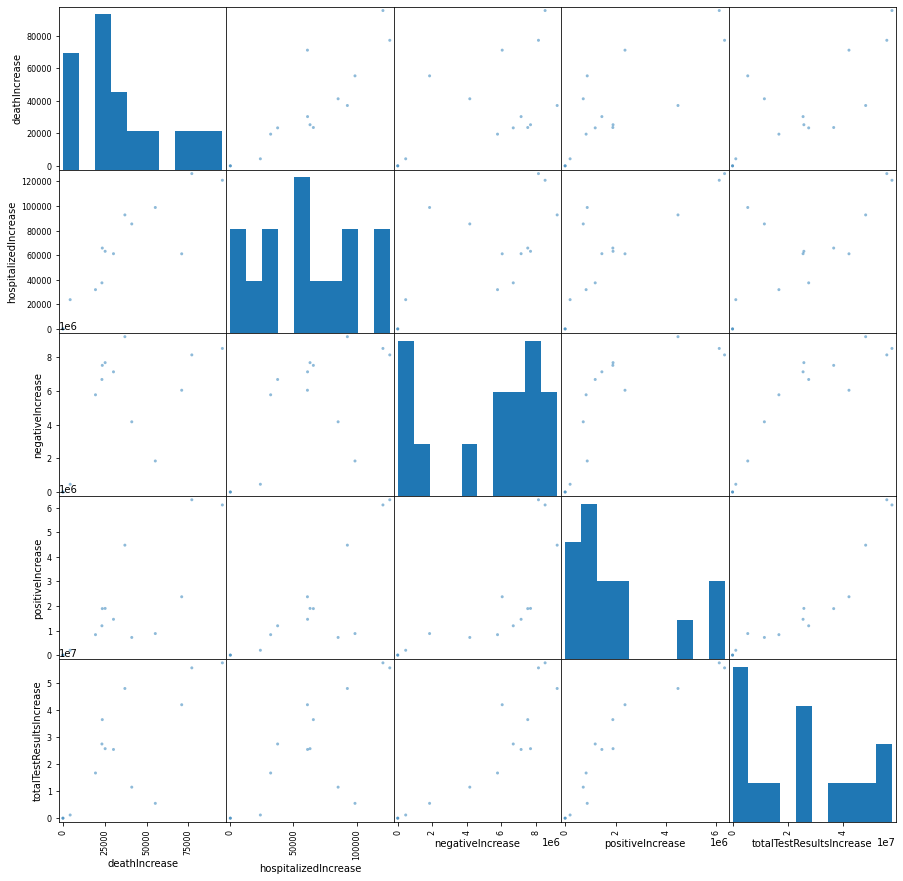

In [79]:
# Plot small multiples for monthly increase cases of different types
# Visualise the relationship between all pairs of columns
month_data_increase=month_data[["deathIncrease","hospitalizedIncrease","negativeIncrease","positiveIncrease","totalTestResultsIncrease"]]
from pandas.plotting import scatter_matrix
scatter_matrix(month_data_increase,figsize=(15,15)) # show the distribution of values for each of the individual features

<font color=red> Further analysis of monthly increase:

The increase numbers and increase rates are plotted here since considering the difference in the number of basic cases, due to the two pandemic outbreak waves.

And plot the two kinds of data on one graph for comparison.

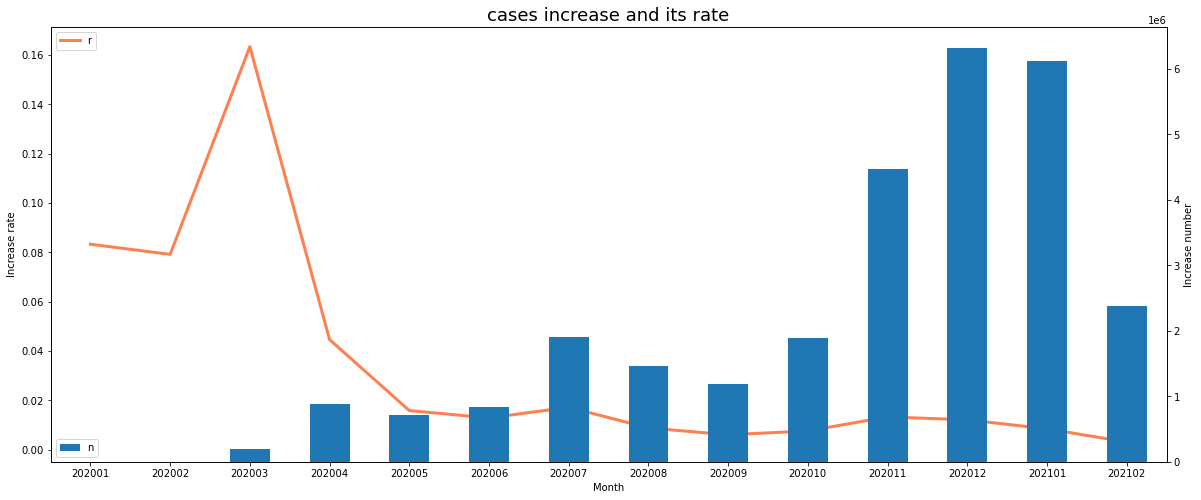

In [69]:
# Define the increase rate
month_data['rate']=month_data['positiveIncrease']/month_data['positive']
month=month_data.index.get_level_values(0) # extract the index value, month, as the axis ticks of the graph
month=month.astype(int) # convert the data format
ax1 = month_data['rate'].plot(x="month", kind="line",figsize=(20,8),color='coral',linewidth=3) # plot the increase rate graph
ax1.set_xticks(month.values)
ax1.set_ylabel("Increase rate")
ax1.set_xlabel("Month")
plt.legend('rate',loc=2)
ax2 = ax1.twinx() # plot the second graph on the basis of the previous one, so need to share the x-axis
month_data['positiveIncrease'].plot(x="month", kind="bar", ax=ax2) # plot the increase graph
ax2.set_ylabel("Increase number")
plt.title("cases increase and its rate",fontsize=18) # make it clearer and more aesthetic
plt.legend('number',loc=3)
plt.show()

The data in March and December have increased significantly. 

Verify whether these two months can be recognised as the key months for the two waves of pandemics:

In [42]:
# Find the month with the highest increase rate
max_rate=month_data['rate'].max() 
month_data[month_data['rate']==max_rate]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed,rate
month,,,,,,,,,,,,,,,,,,
202003,1204026,2792339,483615,97142,118836,14295,1002,2496,0,20720,8650876,4325,23782,460477,196796,1176993,7.784168,0.163448


In [415]:
# Find the month with the highest increase number
max_increase=month_data['positiveIncrease'].max() 
month_data[month_data['positiveIncrease']==max_increase]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,speed
month,,,,,,,,,,,,,,,,,
202012,522459627,1688751397,378992,3467350,19432715,665017,1056990,234190,107538,9269261,7061253472,77112,126244,8143547,6323266,55777321,0.012103


The data of March and December are indeed important.

<font color=red> So specifically analyze the data of these two months:

In [71]:
Mar=data[data["date"].between(20200301,20200331)] # extract data for March
Mar=Mar.set_index("date") # set date as the index
Dec=data[data["date"].between(20201201,20201231)] # extract data for December
Dec=Dec.set_index("date") # set date as the index

Text(0.5, 0.98, 'data of December')

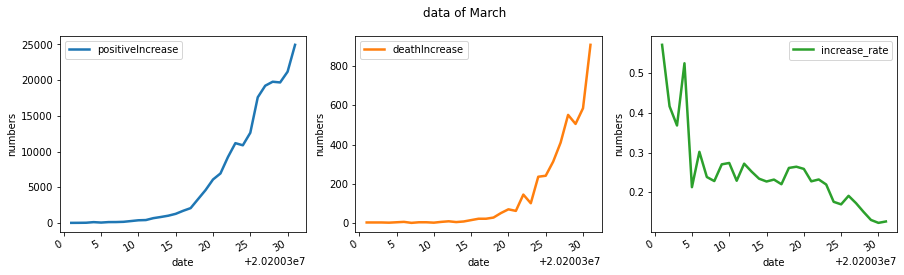

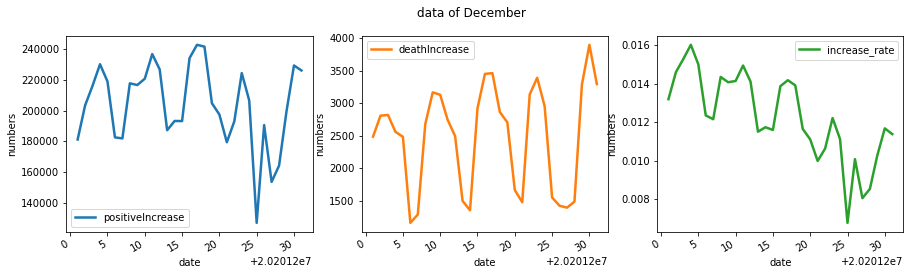

In [73]:
# Analyze the number and rate of increase in cases in the past two months
Mar['increase_rate']=Mar['positiveIncrease']/Mar['positive'] # define the cases increase rate of March and then plot it
Mar[['positiveIncrease','deathIncrease','increase_rate']].plot(subplots=True,layout=(1,3),figsize=(15,4),sharey=False,linewidth=2.5,ylabel="numbers") # show the graphs separately, and do not share the y-axis
plt.suptitle("data of March")
Dec['increase_rate']=Dec['positiveIncrease']/Dec['positive'] # define the cases increase rate of March and then plot it
Dec[['positiveIncrease','deathIncrease','increase_rate']].plot(subplots=True,layout=(1,3),figsize=(15,4),sharey=False,linewidth=2.5,ylabel="numbers") # show the graphs separately, and do not share the y-axis
plt.suptitle("data of December")

The increase in the number of cases in March is stable, and the increase rate is gradually decreasing.

The number of cases in December grew unstable, but the overall value was high. And the increase rate was also unstable, but the rate was lower than in March.

The reasons for these differences may be that the basic cases in the two months are different and they are in different stages of the pandemic respectively.

# Part 5: Collect other data and compare

Obtain COVID-19 data from the UK government website: https://coronavirus.data.gov.uk/details/developers-guide

In [81]:
# Collect data using recommended modules
from requests import get


def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"date":"date","newCases":"newCasesByPublishDate"}'
    )
    
    data = get_data(endpoint)

dataUK=pd.DataFrame(data['data'])
dataUK.head(5)

,date,newCases
0,2021-03-19,3809
1,2021-03-18,5213
2,2021-03-17,4827
3,2021-03-16,4391
4,2021-03-15,4264


<font color=red> Compare UK data with US data by month:

In [83]:
dataUK['month']=[x[:7] for x in dataUK['date'].astype(str)] # convert the data format and pre-processing
month_dataUK=dataUK.groupby("month").sum() # group data by month
month_dataUK=month_dataUK.drop(['2021-03'],axis=0) # drop incomplete data: cannot be collected because it has not happened yet

In [96]:
# Unify the index of the two sets of data in order to merge the data
# Extract the index of UK data before that
compare_month=month_dataUK.index.get_level_values(0)

In [97]:
# Represent the US data using the same data structure
month_dataUS=month_data['positiveIncrease']
month_dataUS.index=compare_month

In [107]:
# Merge these two dataset
comparison=pd.concat([month_dataUS, month_dataUK], axis=1)
comparison.rename(columns={'positiveIncrease':'US', 'newCases':'UK'}, inplace = True) # rename the columns
comparison

,US,UK
month,,
2020-01,2,2
2020-02,16,19
2020-03,196796,20990
2020-04,876338,97335
2020-05,718191,34904
2020-06,831681,8324
2020-07,1900163,18138
2020-08,1457252,28790
2020-09,1192663,98204


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'New Cases')]

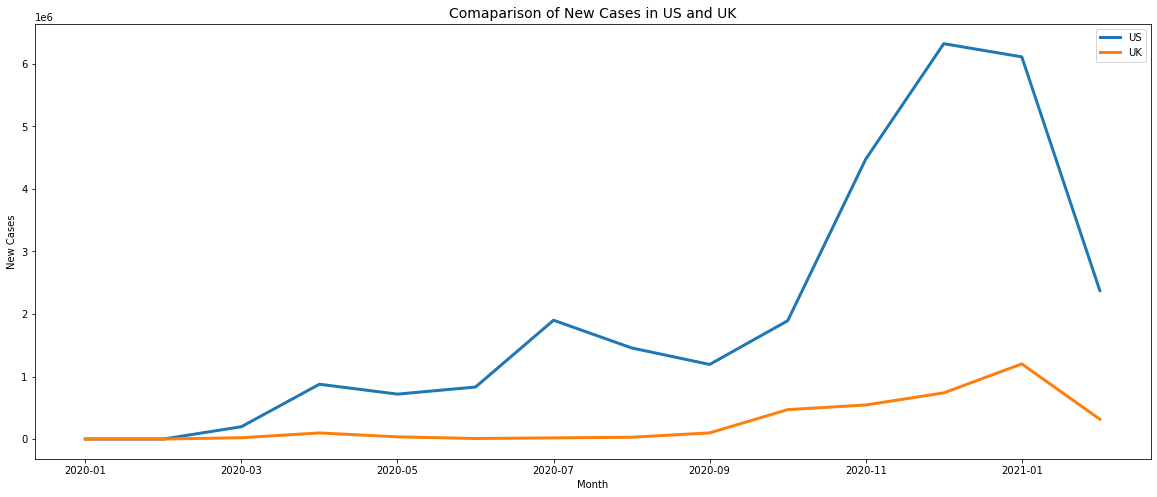

In [109]:
# Plot two data for comparison
vs=comparison.plot(figsize=(20,8),linewidth=3)
vs.set_title("Comaparison of New Cases in US and UK",fontsize=14)
vs.set(xlabel="Month", ylabel="New Cases")